# Lending Club Project

For some of the visualizations in this notebook (and more) but with interactivity visit [here](https://public.tableau.com/app/profile/juan.domene/viz/LendingClub_16575891019940/ofloansbypurposewithinterestrate?publish=yes)

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), when an employee found out about some unusual loans to creditors who didn't meet Lending Club's credit policy; this led to an investigation wich uncovered some alterd dates, among other things. 

We will use lending data from 2007-2010, and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here is what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 0 if the loan was fully paid and 1 if it wasn't.

# Import Libraries

For now only basic libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

## Get the Data

In [21]:
df = pd.read_csv("loan_data.csv")

Check out the head, info, etc.

In [22]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
df.shape

(9578, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [25]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


There are no missing values, so there is not much cleaning to do.

We can see that most people meet the loan policy (about 80% of people) and only 16% didn't pay the full loan.

credit.policy and not.fully.paid are of type int. This is ok for the implementation of the model, but we could change it a bit for the visualizations to be more friendly.

In [26]:
map_policy = {0: "No", 1: "Yes"}
df["Meets policy"] = df["credit.policy"].map(map_policy)
map_paid = {1: "No", 0: "Yes"}
df["Fully paid"] = df["not.fully.paid"].map(map_paid)

In [27]:
df.sample(10)[["credit.policy", "Meets policy", "not.fully.paid", "Fully paid"]]

,credit.policy,Meets policy,not.fully.paid,Fully paid
8377,0,No,0,Yes
4353,1,Yes,0,Yes
7880,0,No,0,Yes
8593,0,No,1,No
2278,1,Yes,0,Yes
5785,1,Yes,0,Yes
136,1,Yes,0,Yes
1289,1,Yes,0,Yes
8869,0,No,0,Yes
5716,1,Yes,0,Yes


# Exploratory Data Analysis

Let's do some data visualizations.

To begin with, Let's see which variables relate the most to a loan being fully paid

<AxesSubplot:>

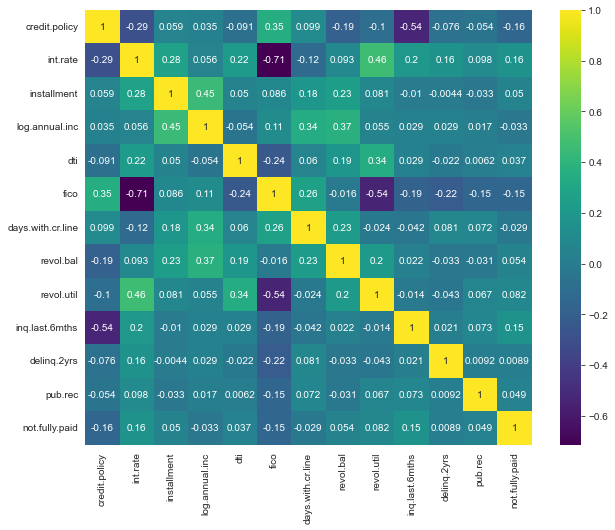

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="viridis", annot=True)

Credit policy, interest rate, FICO score and inquiries by creditors in the last 6 months are the most correlated variables.

Let's compare the FICO distributions for clients who meet vs clients who don't meet the policy criteria.

Text(0.5, 0, 'FICO')

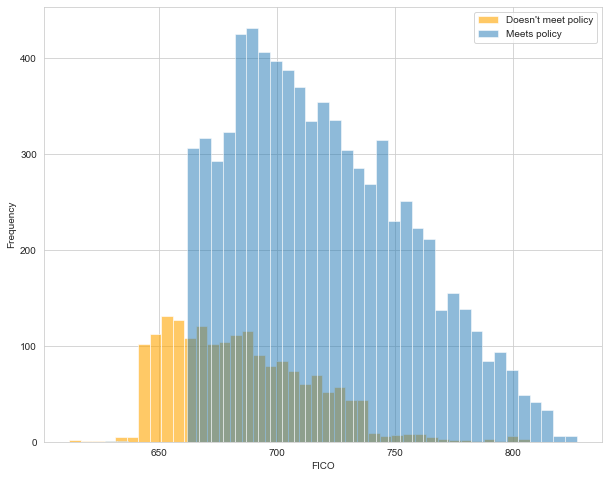

In [43]:
fig = plt.figure(figsize=(10,8))
df[df["credit.policy"]==0]["fico"].plot.hist(bins=40, label="Doesn't meet policy", alpha=0.6, color="orange")
df["fico"][df["credit.policy"]==1].plot.hist(bins=40, label="Meets policy", alpha=0.5)
plt.legend()
plt.xlabel("FICO")

<AxesSubplot:xlabel='fico', ylabel='Meets policy'>

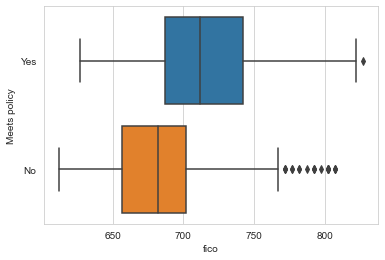

In [34]:
sns.boxplot(x="fico", y="Meets policy", data=df)

FICO score is aparently an important factor to meet the policy criteria (but obviously not the only one). Both FICO distributions are unimodal and highly skewed to the right, meaning that most creditors are in the lower range of the FICO scores. 

Overall, people who meet the policy criteria have a considerably higher median -and therefore the mean, due to the skewness of the distributions- for their FICO score than people who don't meet the criteria.  

Now let's check if FICO score has something to do with fully paying back loans.

Text(0.5, 0, 'FICO')

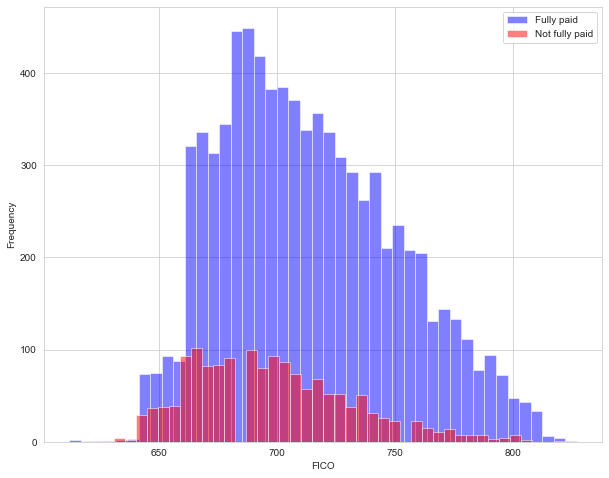

In [50]:
fig = plt.figure(figsize=(10,8))
df[df["not.fully.paid"]==0]["fico"].plot.hist(bins=44, label="Fully paid", alpha=0.5, color="blue")
df["fico"][df["not.fully.paid"]==1].plot.hist(bins=44, label="Not fully paid", alpha=0.5, color="red")
plt.legend()
plt.xlabel("FICO")

<AxesSubplot:xlabel='fico', ylabel='Fully paid'>

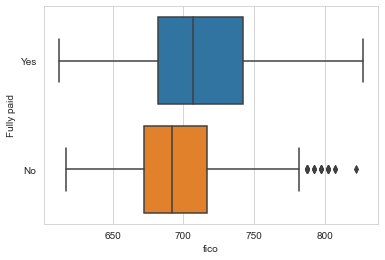

In [53]:
sns.boxplot(x="fico", y="Fully paid", data=df)

In this case the distributions have a more similar shape and are centered closer to each other. The lower FICO score users seem to have a tougher time paying back, but the difference isn't too big. Actually, the user with the lowest FICO score did pay back their loan, while some of the users with highest score didn't. Of course this could have something to do with the amount as well as the date of the loans. We'll investigate that later on. 

For now let's see if the purpose of the loan influences if it is or isn't paid back.

<AxesSubplot:xlabel='purpose', ylabel='count'>

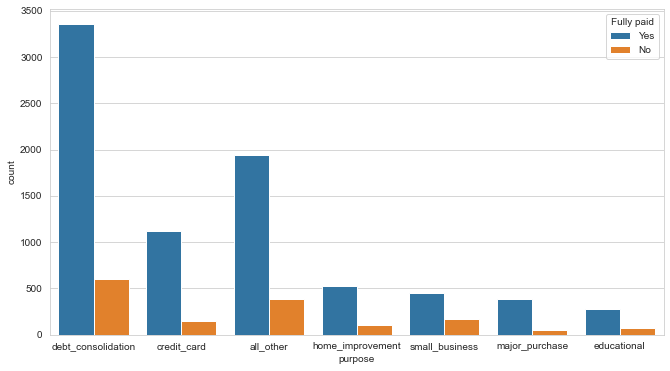

In [54]:
plt.figure(figsize=(11,6))
sns.countplot(x="purpose", data=df, hue="Fully paid")

The paid-to-unpaid loan ratio is similar for all purposes. Let's check for the percentage of paid-to-unpaid for each purpose, in order to get a more precise view of the data.

In [113]:
df1 = df.groupby("purpose").agg({"not.fully.paid": "sum", "fico": "count"})

In [114]:
df1["paid"] = (df1["fico"]-df1["not.fully.paid"])/df1["fico"]*100
df1["not paid"] = df1["not.fully.paid"]/df1["fico"]*100
df1.drop(["not.fully.paid", "fico"], axis=1, inplace=True)
df1.reset_index(inplace=True)

In [116]:
df1.sort_values(by="paid", ascending=False)

,purpose,paid,not paid
5,major_purchase,88.787185,11.212815
1,credit_card,88.431062,11.568938
2,debt_consolidation,84.761183,15.238817
0,all_other,83.397683,16.602317
4,home_improvement,82.988871,17.011129
3,educational,79.883382,20.116618
6,small_business,72.213247,27.786753


Small buisnesses are by far the least safe purpose for a loan, having only a 72% payback rate. Educational purposes are also risky, at almost 80%.

We have seen that FICO score is a factor in the elegibility for a credit given the loan policies. Let's check if FICO score influences the interest rate you get on a loan

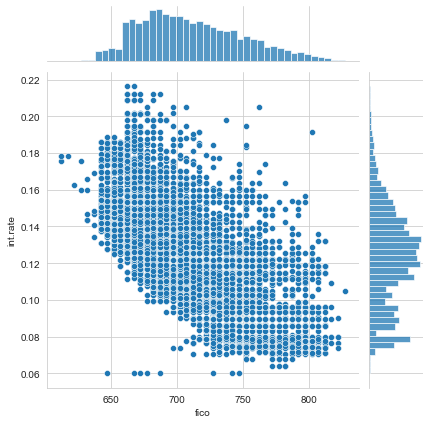

In [130]:
sns.jointplot(x="fico", y="int.rate", data=df)

There is an obvious trend; even though there is a pretty wide spread, there is a clear negative linear relation between interest rate to FICO: if you have a higher FICO score, you'll get lower interest rates. 

Does this trend have something to do with how much people tend to pay back their loans?

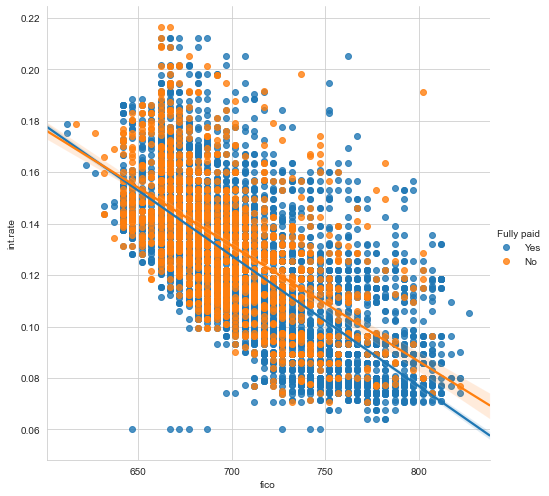

In [134]:
sns.lmplot(x="fico", y="int.rate", data=df, truncate=False, hue="Fully paid", height=7)

There is a slight difference: people who haven't paid back their loans tend to have a higher interest rate, which makes sense: with higher rates it's harder to pay. 

We'll leave here the analysis on the data. For a bit more of analysis and interactive plots visit [here](https://public.tableau.com/app/profile/juan.domene/viz/LendingClub_16575891019940/ofloansbypurposewithinterestrate?publish=yes)


# Setting up the Data

We'll now set up the data in order to implement some models.

## Categorical Features

The **purpose** column is categorical. This means we need to transform it using dummy variables so sklearn will be able to understand them. 

In [148]:
final_data = pd.get_dummies(df, columns=["purpose"], drop_first=True).drop(["Meets policy", "Fully paid"], axis=1)

In [153]:
final_data.sample(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
992,1,0.1197,70.55,11.082143,14.95,682,3120.000000,45028,95.2,1,0,0,0,0,1,0,0,0,0
7821,0,0.1501,403.07,10.388995,0.74,647,238.958333,381,63.5,4,0,0,0,0,0,0,0,0,1
6774,1,0.1114,485.50,10.308953,15.52,737,4020.000000,8458,28.6,1,0,0,0,0,1,0,0,0,0
3948,1,0.1505,173.46,11.350407,14.04,672,5490.000000,9952,97.6,1,0,0,0,0,0,0,0,0,0
5540,1,0.2086,827.33,11.813030,12.78,672,10169.958330,62553,44.2,2,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set. 

In [154]:
from sklearn.model_selection import train_test_split

In [183]:
X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training a Decision Tree Model

Let's try single decision tree first

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

How did the decision tree perform?

In [187]:
from sklearn.metrics import confusion_matrix, classification_report

In [188]:
pred1 = dtree.predict(X_test)

In [189]:
print(confusion_matrix(y_test, pred1), "\n", classification_report(y_test, pred1))

[[2030  406]
 [ 323  115]] 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      2436
           1       0.22      0.26      0.24       438

    accuracy                           0.75      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.76      0.75      0.76      2874



## Training the Random Forest model

Now let's try a forest instead of a single tree

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Predictions and Evaluation

And see how it performs

In [192]:
pred2 = forest.predict(X_test)

In [193]:
print(confusion_matrix(y_test, pred2), "\n", classification_report(y_test, pred2))

[[2415   21]
 [ 429    9]] 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2436
           1       0.30      0.02      0.04       438

    accuracy                           0.84      2874
   macro avg       0.57      0.51      0.48      2874
weighted avg       0.77      0.84      0.78      2874



Overall the forest performed better, but given that we want to spot client's who might not pay back their loans, the decision tree might actually be better. Let's try a logistic regression model.

# Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression

In [196]:
lr_model = LogisticRegression(max_iter=400)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [198]:
pred3 = lr_model.predict(X_test)

In [199]:
print(confusion_matrix(y_test, pred3), "\n", classification_report(y_test, pred3))

[[2422   14]
 [ 433    5]] 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      2436
           1       0.26      0.01      0.02       438

    accuracy                           0.84      2874
   macro avg       0.56      0.50      0.47      2874
weighted avg       0.76      0.84      0.78      2874



It didn't improve the results. Some feature enginering is needed in order to improve the metrics.